# DATA

In [2]:
import numpy as np
import pandas as pd


file_data = np.loadtxt(r'C:\Users\CLL\Documents\Github\Ce888 Assignment\Ce888Assignment\yacht\yacht_hydrodynamics.data', usecols=(0,1,2,3,4,5,6))

data = pd.DataFrame()
data['x1']= file_data[:,0]
data['x2']= file_data[:,1]
data['x3']= file_data[:,2]
data['x4']= file_data[:,3]
data['x5']= file_data[:,4]
data['x6']= file_data[:,5]
data['y']= file_data[:,6]
print(data.columns)
data.to_csv('data_yacht.csv')

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'], dtype='object')


# Analysis 1 DTRegressor

In [3]:
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation metrices

import matplotlib.pyplot as plt # Plotting

data = pd.read_csv('data_yacht.csv')

In [25]:
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,y
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,153.500000,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,89.056162,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,0.000000,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,76.750000,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,153.500000,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,230.250000,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,307.000000,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialise a Decision Tree with maximum depth of 3
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

(246, 6)
(62, 6)


Crossvalidation Coefficient of determination on training set : 0.9883327606385615




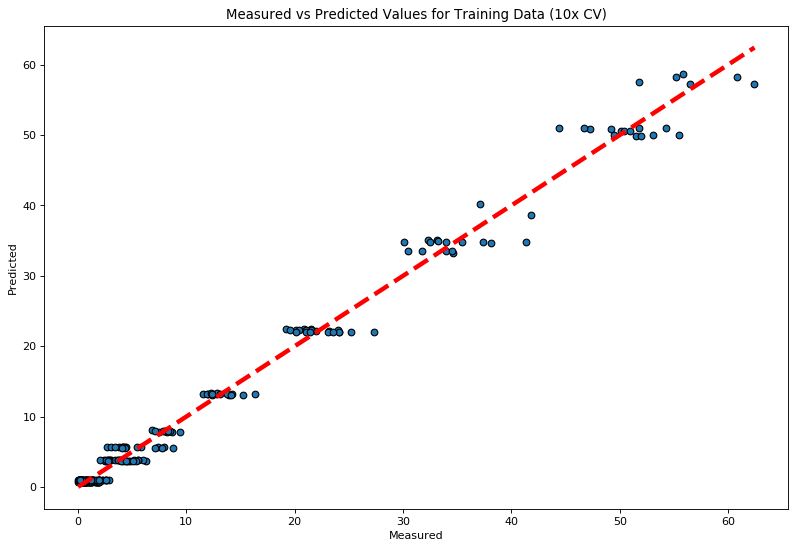

Coefficient of determination on test set:  0.9891666699847904

Mean Squared Error on test set : 1.5635992080673373


In [27]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

# Fit the model and predict
dtRegressor.fit(X_train,y_train)
y_predicted = dtRegressor.predict(X_test)

# Model Performance on test data
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

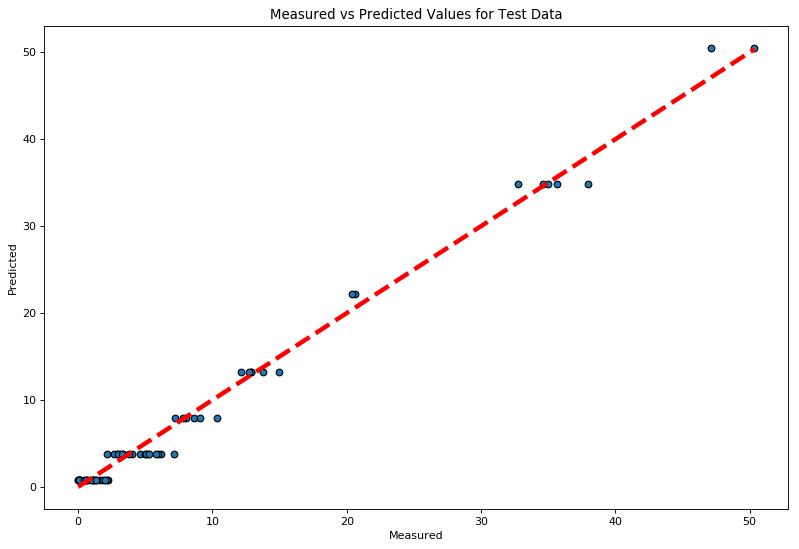

In [28]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

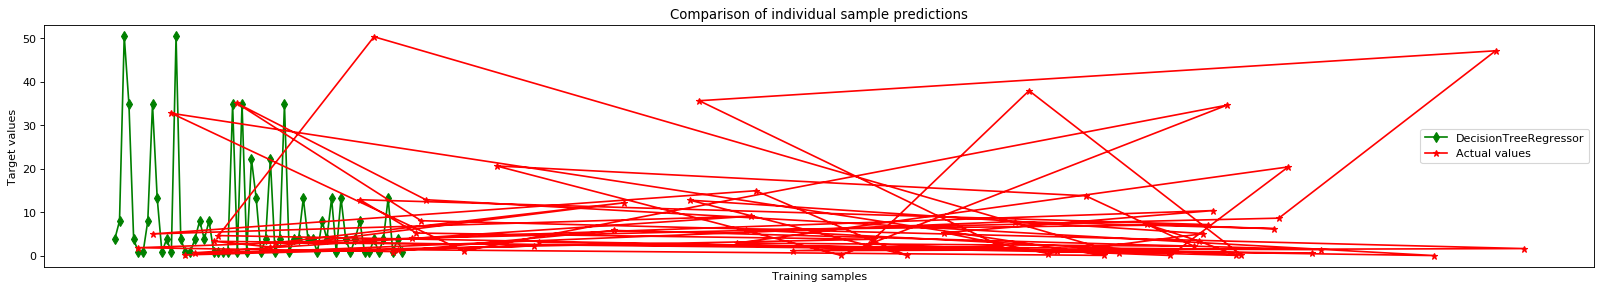

In [29]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='DecisionTreeRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

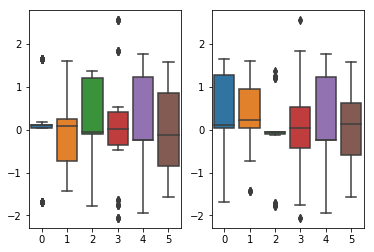

In [30]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#################
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)
plt.show()



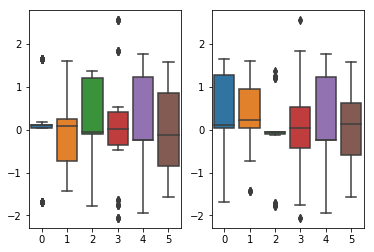

Coefficient of determination on test set:  0.9891666699847904

Mean Squared Error on test set : 1.5635992080673373


In [31]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

plt.subplot(1,2,1)
sns.boxplot(data=X_train_sc)
plt.subplot(1,2,2)
sns.boxplot(data=X_test_sc)
plt.show()

# Fit the model and predict
dtRegressor.fit(X_train_sc,y_train)
y_predicted = dtRegressor.predict(X_test_sc)

# Model Performance on test data
r2_score = dtRegressor.score(X_test_sc,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

# Analysis 2 SGDRegressor

In [32]:
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor


In [40]:
data = pd.read_csv('data_yacht.csv')


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialise a SGDRegressor with penalty l1
SGDReg = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001,
                 l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
                 shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                 n_iter_no_change=5, warm_start=False, average=False)

(246, 6)
(62, 6)


Crossvalidation Coefficient of determination on training set : 0.6003936330152209




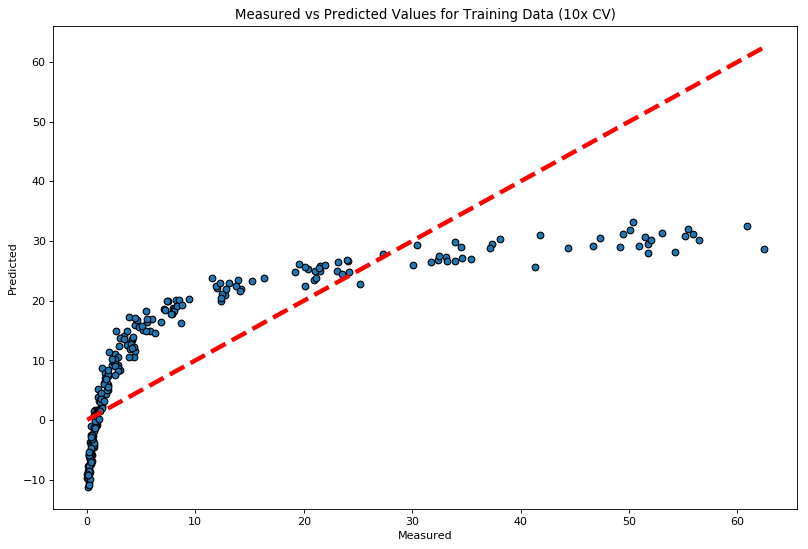

In [41]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(SGDReg, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(SGDReg, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")

# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()


In [42]:
# Fit the model and predict
SGDReg.fit(X_train,y_train)
y_predicted = SGDReg.predict(X_test)

# Model Performance on test data
r2_score = SGDReg.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)


Coefficient of determination on test set:  0.5039312214773948

Mean Squared Error on test set : 71.59873724477094


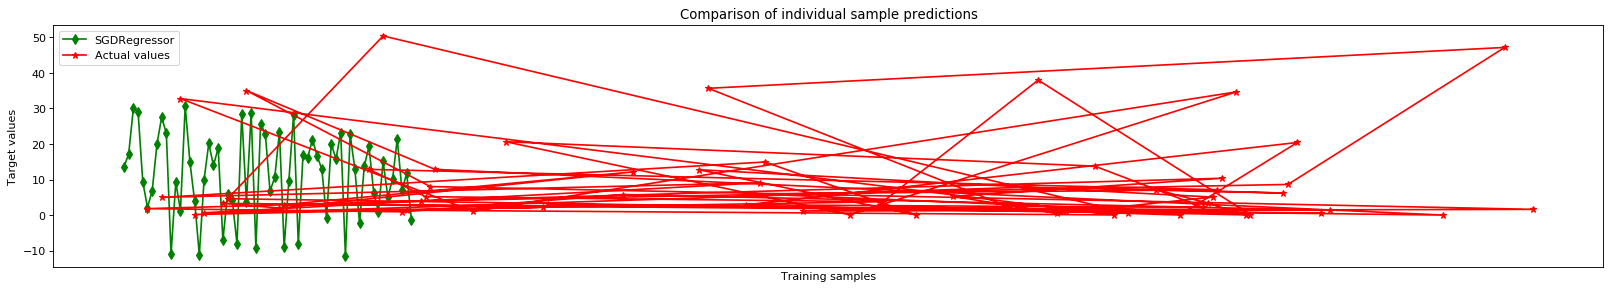

In [43]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='SGDRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

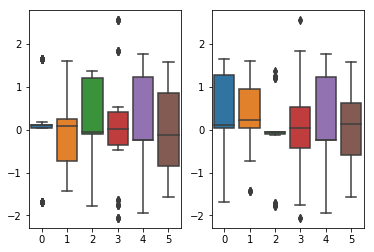

In [44]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#################
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)
plt.show()

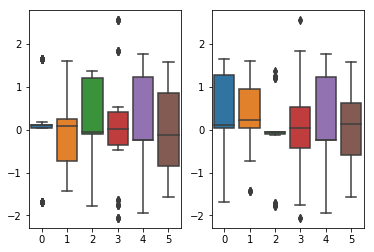

In [45]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

plt.subplot(1,2,1)
sns.boxplot(data=X_train_sc)
plt.subplot(1,2,2)
sns.boxplot(data=X_test_sc)
plt.show()

In [46]:
# Fit the model and predict
SGDReg.fit(X_train_sc,y_train)
y_predicted = SGDReg.predict(X_test_sc)

# Model Performance on test data
r2_score = SGDReg.score(X_test_sc,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.5068544755967398

Mean Squared Error on test set : 71.17681731621988
